In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os

## Figure 3

In [57]:
# Load the checkpoints
beta_cifar10_metrics=torch.load('checkpoints/000030.ckpt', map_location=torch.device('cpu'))
# beta_cifar100_metrics=torch.load('checkpoints/000030.ckpt', map_location=torch.device('cpu'))
# beta_svhn_metrics=torch.load('checkpoints/ch.pt', map_location=torch.device('cpu'))

In [58]:
def plot_non_zero_counts(metrics, layer_str, ax, show_plot, label, clr ,title=None):
    num_params = metrics[layer_str]
    epoch = range(5, 35, 5)
    ax.plot(epoch, num_params, label=label, color=clr)
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel('epoch')
    ax.set_xlim([0, 400])
    ax.set_ylim([1e2, 1e9])
    ax.set_yscale('log')
    if show_plot:
        plt.show()

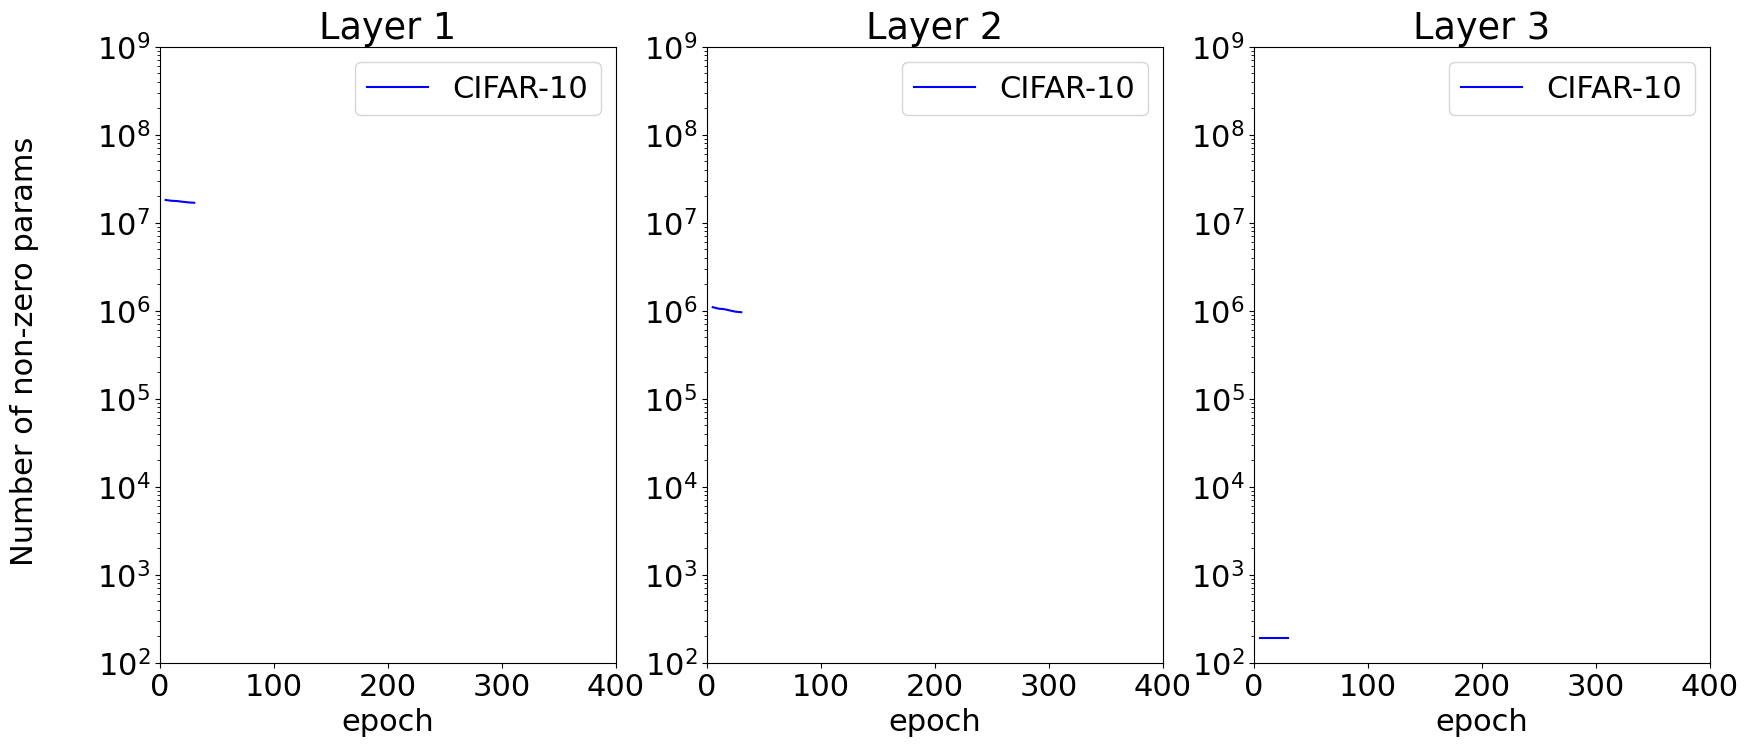

In [59]:
fig, axs = plt.subplots(ncols=3, figsize=(20,8))
plt.rcParams.update({'font.size': 22})

plot_non_zero_counts(beta_cifar10_metrics, 'num_params1', axs[0], False, 'CIFAR-10', 'b', 'Layer 1')
# plot_non_zero_counts(beta_cifar100_metrics, 'num_params1', axs[0], False, 'CIFAR-100', 'o', 'Layer 1')
# plot_non_zero_counts(beta_svhn_metrics, 'num_params2', axs[0], False, 'SVHN', 'g')
plot_non_zero_counts(beta_cifar10_metrics, 'num_params2', axs[1], False, 'CIFAR-10', 'b', 'Layer 2')
# plot_non_zero_counts(beta_cifar100_metrics, 'num_params2', axs[1], False, 'CIFAR-100', 'o', 'Layer 2')
# plot_non_zero_counts(beta_svhn_metrics, 'num_params2', axs[1], False, 'SVHN', 'g')
plot_non_zero_counts(beta_cifar10_metrics, 'num_params3', axs[2], False, 'CIFAR-10', 'b', 'Layer 3')
# plot_non_zero_counts(beta_cifar100_metrics, 'num_params3', axs[2], False, 'CIFAR-100', 'o', 'Layer 3')
# plot_non_zero_counts(beta_svhn_metrics, 'num_params3', axs[2], False, 'SVHN', 'g')

fig.text(0.05, 0.5, 'Number of non-zero params', va='center', rotation='vertical')
plt.savefig('figure_3')
plt.show()

## Figure 4: CIFAR-10

In [45]:
# Load the checkpoints
sfc_sgd_cifar10 = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
sfc_beta_50_cifar10 = torch.load('checkpoints/000040.ckpt', map_location=torch.device('cpu'))
slocal_sgd_cifar10 = torch.load('checkpoints/000020.ckpt', map_location=torch.device('cpu'))

In [46]:
def plot_sfc_filters(filters, abs=False, axs=None, figname=None):
    if axs is None:
        fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(4*2, 2*2))
    random_filter_inds = np.random.randint(low=0, high=len(filters), size=(2 * 4))
    for i in range(2): 
        for j in range(4):
            filter = filters[random_filter_inds[4 * i + j]]            
            if abs:
                filter = filter.abs()
            filter = (filter - filter.min()) / (filter.max() - filter.min())
            filter_reshaped = filter.view(3, 32, 32)
            axs[i][j].imshow(filter_reshaped.permute(1, 2, 0).numpy())
            axs[i][j].axis('off')
    if figname is not None:
        plt.tight_layout()
        plt.savefig(figname)  
    plt.show()
    
def calc_coords_in(i, j, kernel_size=9, stride=2):
    return (int(kernel_size/2) + i * stride , int(kernel_size/2) + j * stride)

def plot_slocal_sin_filter(filters, coords_out, ax=None):
    coords_in = calc_coords_in(coords_out[0], coords_out[1])
    filter = filters[0, 0, : , coords_out[0], coords_out[1], : ]
    filter = filter.view(3, 9, 9).permute(1, 2, 0)
    filter_img = torch.zeros(32, 32, 3)
    filter_img[
        coords_in[0]-int(9/2) : coords_in[0]+int(9/2)+1, 
        coords_in[1]-int(9/2) : coords_in[1]+int(9/2)+1, : ] = filter 
    if ax is not None:
        ax.imshow((filter_img * 255).numpy().astype(np.uint8))
        ax.axis('off')
    else:
        plt.imshow(filter_img)
        
def plot_slocal_filters(filters, figname=None):
    x_inds = np.random.randint(low=0, high=12, size=(2, 4))
    y_inds = np.random.randint(low=0, high=12, size=(2, 4))
    fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(4*2, 2*2))
    for i in range(2):
        for j in range(4):
            x, y = x_inds[i, j], y_inds[i, j]
            plot_slocal_sin_filter(filters, (x, y), axs[i][j])    
    if figname is not None:
        plt.tight_layout()
        plt.savefig(figname)  

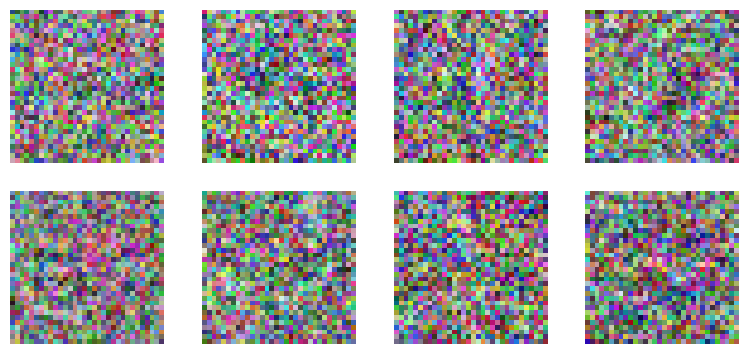

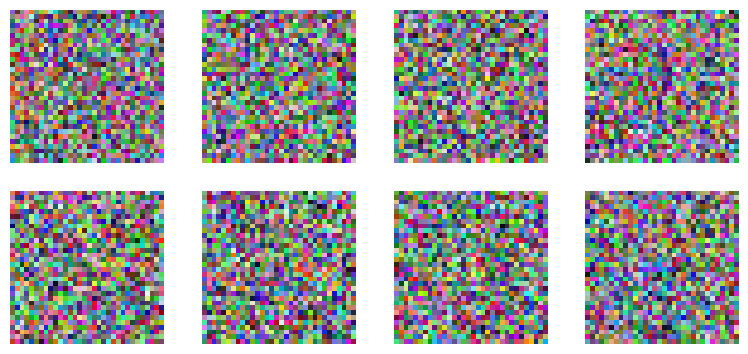

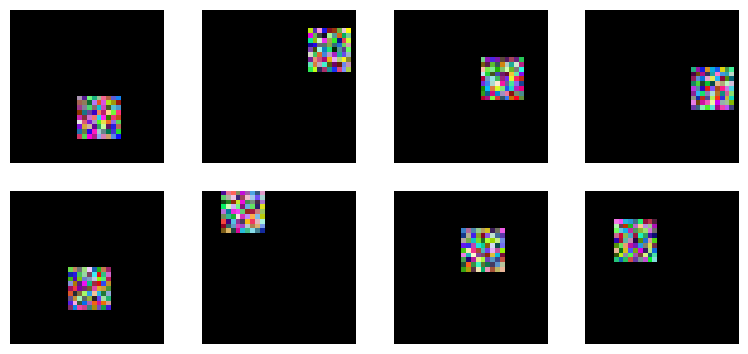

In [48]:
plot_sfc_filters(sfc_sgd_cifar10['network']['0.fc.0.weight'], figname='cifar10_sfc_sgd_filters')
plot_sfc_filters(sfc_beta_50_cifar10['network']['0.fc.0.weight'], figname='cifar10_sfc_beta_50_filters')
plot_slocal_filters(slocal_sgd_cifar10['network']['0.lc.0.weight'], figname='cifar10_slocal_sgd_filters')

## Figure 4: CIFAR-100

In [55]:
# Load the checkpoints
sfc_sgd_cifar100 = torch.load('checkpoints/000120.ckpt', map_location=torch.device('cpu'))
# sfc_beta_50_cifar100 = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# slocal_sgd_cifar100 = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))

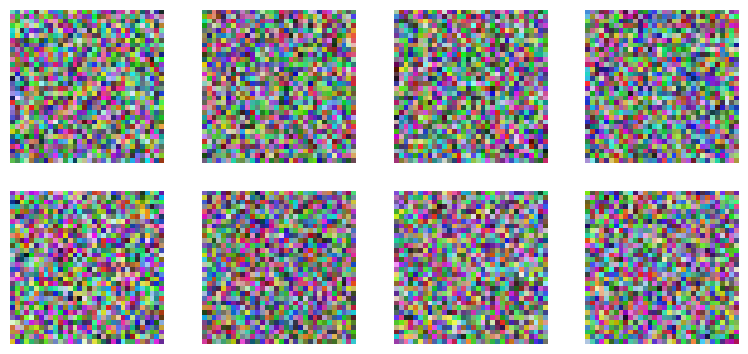

In [56]:
plot_sfc_filters(sfc_sgd_cifar100['network']['0.fc.0.weight'], figname='cifar100_sfc_sgd_filters')
# plot_sfc_filters(sfc_beta_50_cifar100['network']['0.fc.0.weight'], figname='cifar100_sfc_beta_50_filters', abs=True)
# plot_slocal_filters(slocal_sgd_cifar100['network']['0.lc.0.weight'], figname='cifar100_slocal_sgd_filters')

## Figure 4: SVHN

In [ ]:
# Load the checkpoints
# sfc_sgd_svhn = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# sfc_beta_50_svhn = torch.load('checkpoints/000050.pt', map_location=torch.device('cpu'))
# slocal_sgd_svhn = torch.load('checkpoints/000050.pt', map_location=torch.device('cpu'))

In [ ]:
plot_sfc_filters(sfc_sgd_svhn['network']['0.fc.0.weight'], figname='svhn_sfc_sgd_filters')
plot_sfc_filters(sfc_beta_50_svhn['network']['0.fc.0.weight'], figname='svhn_sfc_beta_50_filters', abs=True)
plot_slocal_filters(slocal_sgd_svhn['network']['0.lc.0.weight'], figname='svhn_slocal_sgd_filters')

## Table 2: CIFAR-10

In [54]:
# Load the checkpoints of sfc
sgd_cifar10_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# beta_0_cifar10_metrics = torch.load('checkpoints/.pt', map_location=torch.device('cpu'))
# beta_1_cifar10_metrics = torch.load('checkpoints/.pt', map_location=torch.device('cpu'))
beta_50_cifar10_metrics = torch.load('checkpoints/000040.ckpt', map_location=torch.device('cpu'))
# Load the checkpoints of others
# sconv_cifar10_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# slocal_cifar10_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# 3fc_cifar10_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))

metrics_dict = {
    'SFC + SGD': sgd_cifar10_metrics, 
    'SFC + Beta = 0': beta_0_cifar10_metrics,
    'SFC + Beta = 1': beta_1_cifar10_metrics, 
    'SFC + Beta = 50': beta_50_cifar10_metrics
    'SCONV + SGD': sconv_cifar10_metrics, 
    'SLOCAL + SGD': slocal_cifar10_metrics, 
    '3FC + SGD': 3fc_cifar10_metrics, 
    }

print('Test accuracy:',)
for model_str, metrics in metrics_dict.items():
    print(model_str, ' ---- ', f"{np.round(float(max(metrics['test_acc'])), 2)}")

Test accuracy:
SGD  ----  0.58
Beta = 50  ----  0.56


## Table 2: CIFAR-100

In [ ]:
# Load the checkpoints
# sgd_cifar100_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# beta_0_cifar100_metrics = torch.load('checkpoints/.pt', map_location=torch.device('cpu'))
# beta_1_cifar100_metrics = torch.load('checkpoints/.pt', map_location=torch.device('cpu'))
# beta_50_cifar100_metrics = torch.load('checkpoints/000040.ckpt', map_location=torch.device('cpu'))
# Load the checkpoints of others
# sconv_cifar100_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# slocal_cifar100_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# 3fc_cifar100_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))

metrics_dict = {
    'SFC + SGD': sgd_cifar100_metrics, 
    'SFC + Beta = 0': beta_0_cifar100_metrics,
    'SFC + Beta = 1': beta_1_cifar100_metrics, 
    'SFC + Beta = 50': beta_50_cifar100_metrics
    'SCONV + SGD': sconv_cifar100_metrics, 
    'SLOCAL + SGD': slocal_cifar100_metrics, 
    '3FC + SGD': 3fc_cifar100_metrics, 
    }

print('Test accuracy:',)
for model_str, metrics in metrics_dict.items():
    print(model_str, ' ---- ', f"{np.round(float(max(metrics['test_acc'])), 2)}")

## Table 2: SVHN

In [7]:
# Load the checkpoints
# sgd_svhn_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# beta_0_svhn_metrics = torch.load('checkpoints/.pt', map_location=torch.device('cpu'))
# beta_1_svhn_metrics = torch.load('checkpoints/.pt', map_location=torch.device('cpu'))
# beta_50_svhn_metrics = torch.load('checkpoints/000040.ckpt', map_location=torch.device('cpu'))
# Load the checkpoints of others
# sconv_svhn_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# slocal_svhn_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))
# 3fc_svhn_metrics = torch.load('checkpoints/000050.ckpt', map_location=torch.device('cpu'))

metrics_dict = {
    'SFC + SGD': sgd_cifar100_metrics, 
    'SFC + Beta = 0': beta_0_svhn_metrics,
    'SFC + Beta = 1': beta_1_svhn_metrics, 
    'SFC + Beta = 50': beta_50_svhn_metrics
    'SCONV + SGD': sconv_cifar100_metrics, 
    'SLOCAL + SGD': slocal_cifar100_metrics, 
    '3FC + SGD': 3fc_cifar100_metrics, 
    }

print('Test accuracy:',)
for model_str, metrics in metrics_dict.items():
    print(model_str, ' ---- ', f"{np.round(float(max(metrics['test_acc'])), 2)}")

Test accuracy:
SGD  ----  0.56
Beta = 50  ----  0.54
